In [172]:
from wntr.network import Valve, LinkStatus
from wntr.network.controls import Valve , ValueCondition ,ControlAction
from wntr.network import controls

In [991]:
results.node['pressure'].loc[:,:]

,10,11,12,13,21,22,23,31,32,2,9
183600,90.991181,87.123051,82.208919,83.415292,80.3319,83.732919,84.980004,79.189676,76.077749,36.478696,0.0


<Valve 'prv1' from '12' to '22', valve_type='PRValve', diameter=0.30479999999999996, minor_loss=0.0, setting=21.103161781675514, status=Closed>

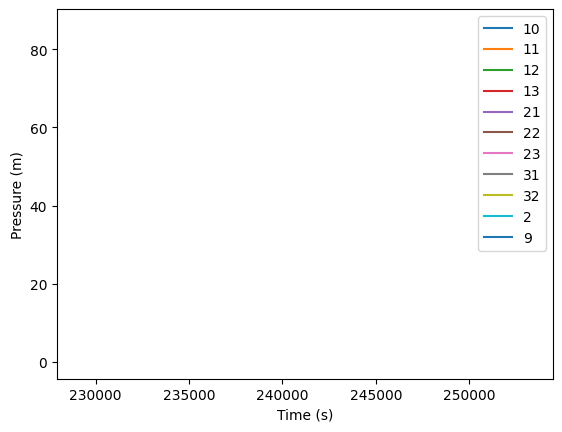

In [1016]:

sim = wntr.sim.WNTRSimulator(wn)

results = sim.run_sim()

pressure_at_node123 = results.node['pressure'].loc[:,:]
# xx = results.link["flowrate"].loc[:,"10"].plot()
ax = pressure_at_node123.plot()
text = ax.set_xlabel("Time (s)")
text = ax.set_ylabel("Pressure (m)")
list(wn.valves())[1][1]

In [1015]:
pipe = wn.get_link('prv1')
pipe
act1 = ControlAction(pipe, 'status', LinkStatus.Active)
cond2 = controls.SimTimeCondition(wn, '=', int(wn.sim_time))
c1 = controls.Control(cond2,act1,name="xx")
wn.remove_control("xx")
wn.add_control("xx" ,c1)
sim = wntr.sim.WNTRSimulator(wn)
results = sim.run_sim()

In [1008]:
wn.remove_control("xx")

KeyError: 'xx'

In [1018]:
wn.reset_initial_values()

In [1070]:
list(wn.nodes)

['10', '11', '12', '13', '21', '22', '23', '31', '32', '9', '2']

In [1069]:
type(wn.sim_time)

float

In [1022]:
import random

In [1068]:
bin(random.randint(1,128))
bin(12)[2:]

'1100'

In [1056]:
np.array(list(bin(random.randint(1,128))[2:].zfill(3)))

array(['1', '0', '1', '1', '1'], dtype='<U1')

In [170]:
list(wn.controls())

[('control 1',
  <Control: '', <ValueCondition: 2, level, <, 33.528>, [<ControlAction: 9, status, OPEN>], [], priority=3>),
 ('control 2',
  <Control: '', <ValueCondition: 2, level, >, 42.672000000000004>, [<ControlAction: 9, status, CLOSED>], [], priority=3>)]

In [166]:
wn.get_link("4").status = "2"


AttributeError: can't set attribute

In [1090]:
dir(results.node["pressure"])

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex_

In [1094]:
np.array(results.node["pressure"].values[-1])

array([81.003, 81.003, 84.475, 85.958, 21.103, 22.129, 23.617, 20.783, 17.494, 38.763,  0.   ])

In [1160]:
np.random.choice(1
                )

0

1.0.0


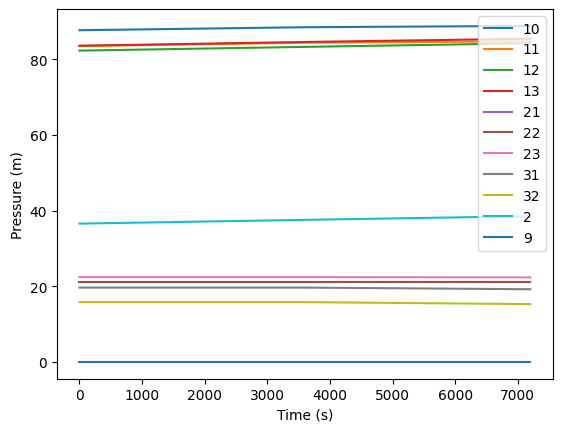

In [913]:
import wntr

print(wntr.__version__)
wn = wntr.network.WaterNetworkModel('networks/net1_withValve.inp')
# print(list(wn.nodes.values()))
# print(wn.junctions)


wn.options.time.duration = 3600 * 2
wn.options.time.hydraulic_timestep = 3600
sim = wntr.sim.WNTRSimulator(wn)



results = sim.run_sim()

pressure_at_node123 = results.node['pressure'].loc[:,:]
# xx = results.link["flowrate"].loc[:,"10"].plot()
ax = pressure_at_node123.plot()
text = ax.set_xlabel("Time (s)")
text = ax.set_ylabel("Pressure (m)")


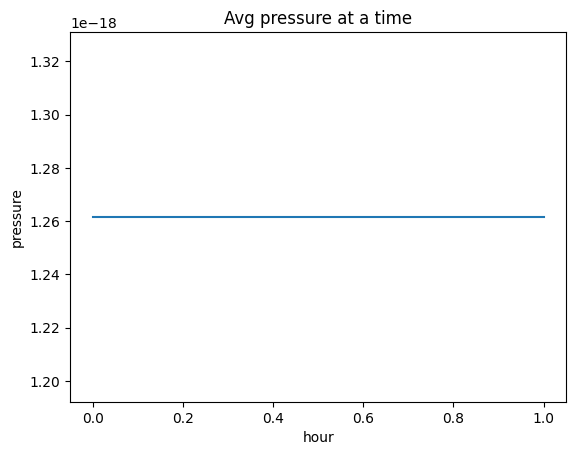

In [66]:
import numpy as np 
from matplotlib import pyplot as plt 


plt.title("Avg pressure at a time") 
plt.xlabel("hour") 
plt.ylabel("pressure") 


avg_pressure_per_time =pressure_at_node123.to_numpy().mean(axis=1)
plt.plot(range(len(avg_pressure_per_time)),avg_pressure_per_time)
plt.show()

In [868]:
results = sim.run_sim()

np.array([results.node['pressure'][node] for node in wn.nodes])

array([[82.983],
       [82.983],
       [86.455],
       [87.938],
       [86.031],
       [87.056],
       [88.544],
       [85.711],
       [82.422],
       [ 0.   ],
       [40.743]])

In [729]:
results.node["demand"]

,10,11,12,13,21,22,23,31,32,2,9
10800,0.0,0.011356,0.011356,0.007571,0.011356,0.015142,0.011356,0.007571,0.007571,0.034916,-0.118195


In [730]:
results.node

OrderedDict([('head',
                             10          11          12          13          21          22  \
              10800  305.818949  301.802252  298.321671  298.004044  234.463162  232.939162   
              
                             23          31         32           2       9  
              10800  232.662246  232.579107  231.69276  298.310019  243.84  ),
             ('demand',
                      10        11        12        13        21        22        23  \
              10800  0.0  0.011356  0.011356  0.007571  0.011356  0.015142  0.011356   
              
                           31        32         2         9  
              10800  0.007571  0.007571  0.034916 -0.118195  ),
             ('pressure',
                            10         11         12         13         21         22  \
              10800  89.410949  85.394252  84.961671  86.168044  21.103162  21.103162   
              
                            23         31        32      

In [731]:
wn.num_valves


3

In [ ]:
wn.get_node("10").pressure

In [1]:
from environment import WaterNetworkEnv
env = WaterNetworkEnv("./networks/net1_withValve.inp")
env.action_space.sample()

array([0, 1, 0], dtype=int32)

In [2]:
env.step(env.action_space.sample())

AttributeError: 'tuple' object has no attribute 'initial_status'

In [ ]:
ax = wntr.graphics.plot_network(wn, node_attribute='pressure',node_colorbar_label='Elevation (m)')

In [ ]:
pressure_at_node123 = results.link['flowrate'].loc[: , "2062"]
pressure_at_node123.plot()

In [ ]:
list(wn.valves())

In [ ]:
type(list(wn.valves())[0][1])

In [ ]:
from wntr.network.elements import PRValve

In [ ]:
p =list(wn.valves())[0][1]
p.initial_status = 0

In [ ]:
list(wn.nodes)

In [ ]:
results.node['pressure']["211"]

In [ ]:
sim.run_sim().node['pressure']["211"]